In [7]:
# 일단 폭염일 때 가장 많은 질병 10개를 골라야함.

import pandas as pd
join = pd.read_csv("2022년도_진료_온도_100개이하_제거.csv")
join.head()

,Unnamed: 0.1,Unnamed: 0,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,...,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,최고기온
0,0,0,2022,323087,671512,2,14,41,2022-03-25,3,...,I10,E785,1,1,0.15,12130,1500,10630,0,17.6
1,1,1,2022,661178,195643,2,15,41,2022-03-25,3,...,M17,M5440,1,1,0.15,12130,1500,10630,0,17.6
2,2,2,2022,49859,79868,2,14,41,2022-03-25,3,...,I10,L2085,1,1,0.15,12130,1500,10630,90,17.6
3,3,3,2022,976687,280439,2,14,41,2022-03-25,3,...,I10,K297,1,1,0.15,12130,1500,10630,5,17.6
4,4,4,2022,542027,907728,2,14,41,2022-03-25,3,...,I10,H814,1,1,0.15,12130,1500,10630,30,17.6


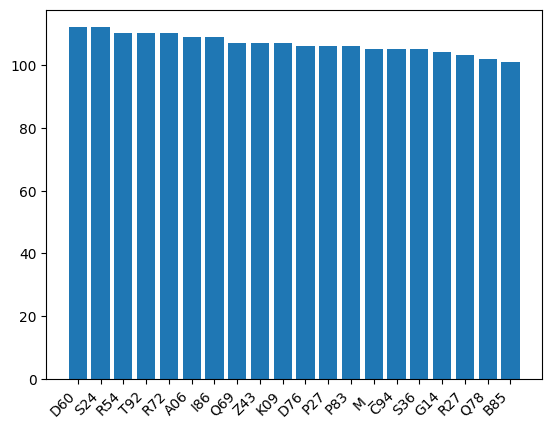

259

In [8]:

import matplotlib.pyplot as plt

# 표본이 500 개 미만인 거는 절삭
join_del100 = join.value_counts("주상병코드")
    
x_bar = []
y_bar = []

for i in join_del100.index:
    if 100 < join_del100[i] < 500:
        x_bar.append(i)
        y_bar.append(join_del100[i])
        

plt.bar(x_bar[-20:], y_bar[-20:])
plt.xticks(rotation=45, ha='right')
plt.show()

len(x_bar)

In [9]:
# 한 20분 걸리네
for x in x_bar:
    join = join[join.주상병코드 != x]

join.head()

,Unnamed: 0.1,Unnamed: 0,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,...,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,최고기온
0,0,0,2022,323087,671512,2,14,41,2022-03-25,3,...,I10,E785,1,1,0.15,12130,1500,10630,0,17.6
1,1,1,2022,661178,195643,2,15,41,2022-03-25,3,...,M17,M5440,1,1,0.15,12130,1500,10630,0,17.6
2,2,2,2022,49859,79868,2,14,41,2022-03-25,3,...,I10,L2085,1,1,0.15,12130,1500,10630,90,17.6
3,3,3,2022,976687,280439,2,14,41,2022-03-25,3,...,I10,K297,1,1,0.15,12130,1500,10630,5,17.6
4,4,4,2022,542027,907728,2,14,41,2022-03-25,3,...,I10,H814,1,1,0.15,12130,1500,10630,30,17.6


In [10]:
# 10만 여개 사라짐
join.shape

(12898802, 21)

In [11]:
# 주상병코드 종류는 600여개 사라짐.
join.value_counts("주상병코드")

주상병코드
U_     825651
J20    774550
I10    773170
F_     484001
E11    420677
        ...  
D31       502
G72       100
T60       100
N23       100
S04       100
Length: 610, dtype: int64

In [12]:
up_30 = join[(join["최고기온"] >= 30)]
print(up_30.head())
print(up_30.shape)

         Unnamed: 0.1  Unnamed: 0  기준년도  가입자일련번호  진료내역일련번호  성별코드  연령대코드  시도코드  \
3962779       3966187     3966187  2022   120361  11714930     2     14    41   
3962780       3966188     3966188  2022   190937  11714937     2     17    41   
3962781       3966189     3966189  2022   414569  11720032     2     15    41   
3962782       3966190     3966190  2022   789191   9746182     2     15    41   
3962783       3966191     3966191  2022   916757  11170828     2     14    41   

             요양개시일자  서식코드  ...  주상병코드  부상병코드 요양일수  입내원일수  심결가산율  심결요양급여비용총액  \
3962779  2022-05-24     3  ...    R79     F_    1      1   0.15       12130   
3962780  2022-05-24     3  ...    I10   E785    1      1   0.15       12130   
3962781  2022-05-24     3  ...    K63   K291    1      1   0.15       12130   
3962782  2022-05-24     3  ...    D18   I109    1      1   0.15       12130   
3962783  2022-05-24     3  ...    T00  S2340    1      1   0.15       12130   

         심결본인부담금  심결보험자부담금  총처방일수  최고기

In [13]:
# 폭염인 날짜에 대해서 주상병코드 많은 것 10개 추출
up30_li = up_30.value_counts("주상병코드")
print(type(up30_li))


<class 'pandas.core.series.Series'>


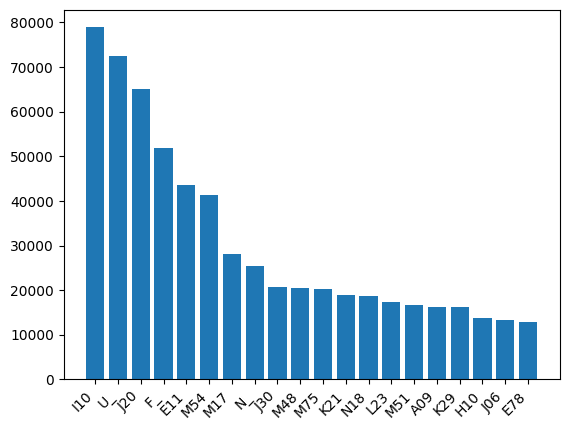

In [14]:
import matplotlib.pyplot as plt

plt.bar(up30_li.index[:20], up30_li.values[:20])
plt.xticks(rotation=45, ha='right')
plt.show()


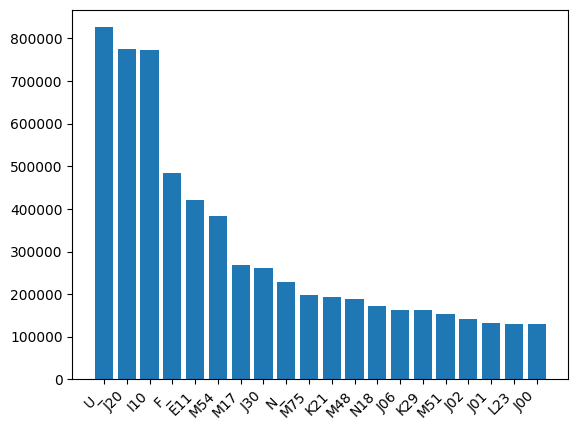

In [15]:
join_li = join.value_counts("주상병코드")

plt.bar(join_li.index[:20], join_li.values[:20])
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
ratio_up30_join = {}

for i in up30_li.index :
    ra = up30_li[i] / join_li[i]
    ratio_up30_join[i] = ra

ratio_up30_join

{'I10': 0.10198403973252972,
 'U_': 0.08786521181467714,
 'J20': 0.08403847395261765,
 'F_': 0.10701837392897949,
 'E11': 0.10363057642799582,
 'M54': 0.10799627193955738,
 'M17': 0.10466447593415908,
 'N_': 0.11137552713083343,
 'J30': 0.07931068808674212,
 'M48': 0.10847999148007136,
 'M75': 0.10255186974704616,
 'K21': 0.09701131189087837,
 'N18': 0.10815856762664595,
 'L23': 0.13285295759995716,
 'M51': 0.1086336615573348,
 'A09': 0.13566490510851864,
 'K29': 0.1005504541864139,
 'H10': 0.11643115235203311,
 'J06': 0.0815822379456525,
 'E78': 0.10529697373878673,
 'J02': 0.08817381971218348,
 'J01': 0.0857593984962406,
 'M79': 0.10188413974267664,
 'S33': 0.10748010713796946,
 'J00': 0.08281243963685532,
 'J03': 0.08670806632754179,
 'M47': 0.11161189426355915,
 'N40': 0.09947643979057591,
 'B35': 0.14323960536630823,
 'H04': 0.10708005762969518,
 'M65': 0.10995112505686523,
 'L50': 0.12727641452038127,
 'H52': 0.1241669879385361,
 'M77': 0.10715282073675145,
 'S93': 0.108707292197

In [17]:
sorted_dict = sorted(ratio_up30_join.items(), key= lambda item:item[1], reverse=True)
print(sorted_dict)



[('T63', 0.29549902152641877), ('G72', 0.2), ('T60', 0.19), ('S51', 0.1745144985368449), ('T22', 0.16794603396138638), ('B36', 0.1625), ('S91', 0.16024082436031029), ('N23', 0.16), ('S41', 0.15905743740795286), ('S81', 0.15487157255879483), ('T21', 0.14932614555256066), ('L01', 0.1478319783197832), ('S50', 0.14687335785601682), ('S69', 0.1449814126394052), ('T24', 0.14388345639592895), ('T14', 0.14384261624936126), ('B35', 0.14323960536630823), ('T30', 0.14254038644282546), ('A08', 0.14155363748458694), ('S04', 0.14), ('B98', 0.13671875), ('L64', 0.13670411985018727), ('S90', 0.1361528892909646), ('T00', 0.13570391872278664), ('A09', 0.13566490510851864), ('E16', 0.13409961685823754), ('H05', 0.1337386018237082), ('S14', 0.1335478680611424), ('B30', 0.13310242454230578), ('L23', 0.13285295759995716), ('R60', 0.1325115562403698), ('R63', 0.13245517746066593), ('G61', 0.13195342820181113), ('I80', 0.13161764705882353), ('R20', 0.1315630657815329), ('R13', 0.13139801375095492), ('S96', 0.

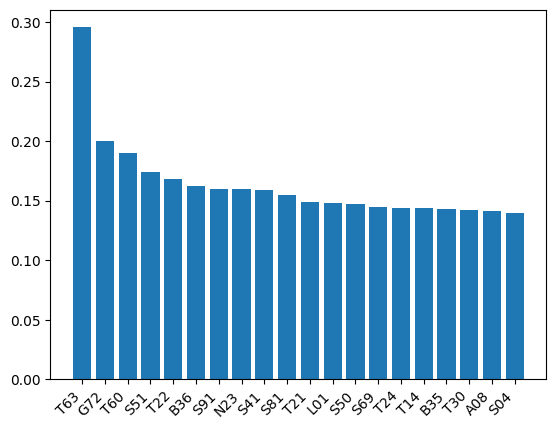

In [18]:
ratio_up30_join = {}

for i in up30_li.index :
    ra = up30_li[i] / join_li[i]
    ratio_up30_join[i] = ra

sorted_dict = sorted(ratio_up30_join.items(), key= lambda item:item[1], reverse=True)

x_bar = []
y_bar = []

for x in sorted_dict:
    x_bar.append(x[0])
    y_bar.append(x[1])

plt.bar(x_bar[:20], y_bar[:20])
plt.xticks(rotation=45, ha='right')
plt.show()

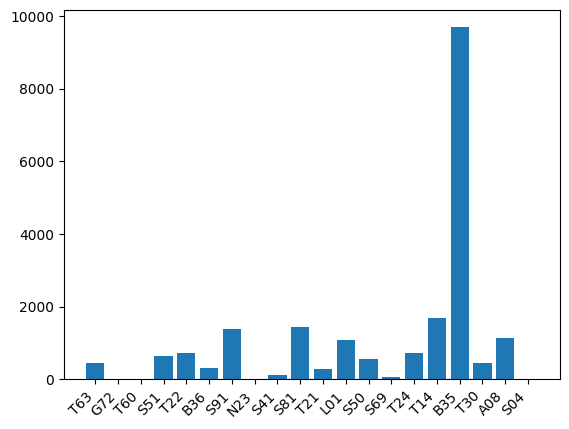

In [19]:
x_bar = []
y_bar = []

for x in sorted_dict:
    x_bar.append(x[0])
    y_bar.append(up30_li[x[0]])

plt.bar(x_bar[:20], y_bar[:20])
plt.xticks(rotation=45, ha='right')
plt.show()

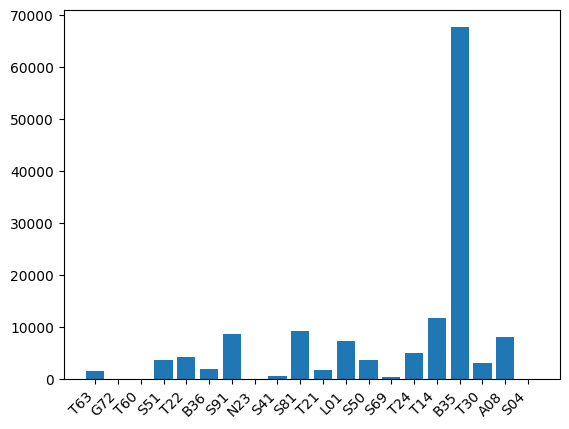

In [20]:
x_bar = []
y_bar = []

for x in sorted_dict:
    x_bar.append(x[0])
    y_bar.append(join_li[x[0]])

plt.bar(x_bar[:20], y_bar[:20])
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
join.to_csv("2022년도_진료_온도_100개이하_제거.csv", encoding="utf-8-sig")